<a href="https://colab.research.google.com/github/amadeu100401/atividade_pratica_machineLearning/blob/main/Atividade_Pratica_1_BolsaFamilia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática I - Análise de dados do bolsa família
* Alunos: Amadeu Martim Silva De Oliveira e Paulo Henrique Medeiros Bittencourt 

# Sobre a base de dados

> A base dados analisada trata-se do cadastro único do governo federal onde consta os dados sobre famílias cadastradas no programa do Bolsa Família -Programa de transferência de renda para famílias na linha da pobreza.
Essa base dados é composta por dois arquivos, onde um é referente às familias e o outro é referente as pessoas em individual.

#Análises feitas a partir dos dados coletados

>1 -  No cenário analisado por nós, vamos buscar uma relação com a localidade das famílias, se as mesmas vivem nos centros urbanas, ou são famílias de localidades rurais, analisando também a quantidade média de membros nas famílias.

>2 -  Além disse, vamos analisar se as famílias cadastradas no bolsa família são mais indígenas ou quilombolas.

> *OBS: A análise será feita por meio da base de dados das famílias.
# Informações úteis
[Link sobre o guia do pesquisadores](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf)

[Link para baixar a base de dados](https://www.data2learning.com/repo/iachallenge/Dataset_CadastroUnico_Sergipe.zip)

OBS: O arquivo está em formato .zip e é composto por três outros arquivos:

* data_familia_sergipe.csv: dados das famílias.
* data_pessoas_sergipe.csv: dadaos das pessoas.
* Dicionario_base_desidentificada_pt.xlsx: dicionário de dados explicando o que é cada uma dos campos das bases.


In [ ]:
# Importação das bibliotecas

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importação da base de dados familias
data_familia = pd.read_csv("/content/drive/MyDrive/Análise de dados/data_familia_sergipe.csv")
data_familia


,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,2800308,2,1,4250243.0,2018-12-05,2018-12-05,100.0,2018-12-05,1.0,1.0,...,2.0,2.0,US JOSE QUINTILIANO DA FONSECA SOBRAL CIDADE NOVA,2771.0,CRAS RISOLETA NEVES,2.800300e+10,0.0,1,3,550245146328323
82271,2800308,2,1,4250244.0,2012-10-15,2018-10-01,8.0,2018-08-13,1.0,1.0,...,2.0,2.0,US JOAO BEZERRA AREIA BRANCA,3425.0,CRAS ANTONIO VALENCA ROLLEMBERG,2.800300e+10,0.0,1,3,550245146328323
82272,2800308,2,1,4250245.0,2016-10-19,2018-10-01,97.0,2017-10-18,1.0,1.0,...,2.0,2.0,US ADEL NUNES BAIRRO AMERICA,2305.0,CRAS ENEDINA BOMFIM SANTOS,2.800302e+10,0.0,1,3,550245146328323
82273,2800308,2,1,4250246.0,2016-05-10,2016-05-10,880.0,2016-05-10,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550245146328323


In [ ]:
#Importando base de dados pessoas 
#data_pessoas = pd.read_csv("/content/drive/MyDrive/Análise de dados/data_pessoas_sergipe.csv")
#data_pessoas

In [ ]:
#Usando o método de describe com todas as colunas da tabela
data_familia.describe()

,cd_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,...,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,cod_eas_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
count,8.227500e+04,82275.000000,82275.000000,8.227500e+04,82275.000000,82170.000000,82170.000000,78105.000000,78119.000000,78127.000000,...,78127.000000,78127.000000,82275.000000,82245.000000,3.334600e+04,2.819600e+04,79637.000000,82275.00000,82275.000000,8.227500e+04
mean,2.803577e+06,1.899240,2.530696,2.355336e+06,218.447414,1.325009,1.051041,4.866423,1.965079,3.451035,...,1.187400,1.723399,1.999635,1.993823,1.748601e+06,2.802421e+10,17.526376,0.61461,2.511188,5.502509e+14
std,2.333552e+03,0.301012,0.758910,1.456629e+06,304.996336,0.468381,0.228279,1.113348,0.669059,1.536850,...,0.818479,0.938764,0.019092,0.078349,1.342713e+06,2.408222e+07,59.999486,0.48669,1.409489,7.763423e+10
min,2.800100e+06,1.000000,1.000000,1.834150e+05,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.216000e+03,2.800100e+10,0.000000,0.00000,1.000000,5.500504e+14
25%,2.801306e+06,2.000000,2.000000,1.566418e+06,36.000000,1.000000,1.000000,4.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,3.093000e+03,2.800300e+10,0.000000,0.00000,1.000000,5.502184e+14
50%,2.803500e+06,2.000000,3.000000,2.530911e+06,75.000000,1.000000,1.000000,5.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.421380e+06,2.801302e+10,0.000000,1.00000,2.000000,5.502451e+14
75%,2.805505e+06,2.000000,3.000000,3.830438e+06,282.000000,2.000000,1.000000,5.000000,2.000000,5.000000,...,1.000000,3.000000,2.000000,2.000000,2.476959e+06,2.804502e+10,0.000000,1.00000,3.000000,5.502791e+14
max,2.807600e+06,2.000000,3.000000,4.250247e+06,2811.000000,2.000000,3.000000,20.000000,20.000000,7.000000,...,6.000000,3.000000,2.000000,2.000000,7.859082e+06,2.807601e+10,306.000000,1.00000,14.000000,5.504321e+14


#Algumas considerações sobre o método describe e tabelas da base da dados
>Iremos montar uma tabela apenas com as colunas que são relevantes ao nosso estudo de caso, por tanto, iremos desconsiderar outros aspéctos, como data em que tal família se increveu no programa. 

>Outro ponto são as tabelas que contém dados que são numéricos, porém de cunho qualitativos, onde esses vão ser desconsiderados, mesmo aparecendo quando rodamos o método de describe.

# Informações sobre as tabelas utilizadas

Aqui está uma tabela relacionando as colunas utilizadas com suas respectivas definições e seus valores


---



| Atributo | Definição | Chave dos valores |
|:--------|:--------:|:--------:|
| cod_local_domic_fam | Se a família mora na zona urbana ou rual | 1 = Urbano e 2 = Rural |
| cod_familia_indigena_fam | Se a família é indigena | 1 = sim e 2 = não |
| ind_familia_quilombola_fam | Se a família é quilombola | 1= sim e 2 = não |
| vlr_renda_media_fam | Renda média da família | Valor em reais |
| qtde_pessoas | Quantidades de pessoas na família | |



In [ ]:
#Montando uma tabela nova com as colunas que serão analisadas
df_familia = data_familia.iloc[:,[8,21,22,6,29]]
df_familia


,cod_local_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,vlr_renda_media_fam,qtde_pessoas
0,1.0,2.0,2.0,58.0,4
1,2.0,2.0,2.0,190.0,5
2,1.0,2.0,2.0,100.0,2
3,1.0,2.0,2.0,937.0,1
4,2.0,2.0,2.0,25.0,2
...,...,...,...,...,...
82270,1.0,2.0,2.0,100.0,3
82271,1.0,2.0,2.0,8.0,3
82272,1.0,2.0,2.0,97.0,3
82273,1.0,2.0,2.0,880.0,1


In [ ]:
#Verificando o intervalo da quantidade de pessoas por família
data_features = df_familia[["qtde_pessoas"]]
print(f"Quantidade mínima de membros: {data_features.min()}")
print(f"Quantidade máxima de membros: {data_features.max()}")

Quantidade mínima de membros: qtde_pessoas    1
dtype: int64
Quantidade máxima de membros: qtde_pessoas    14
dtype: int64


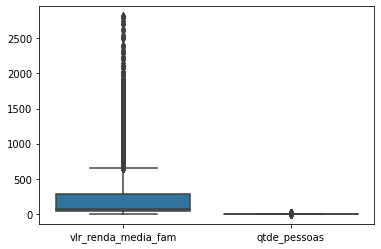

In [ ]:
#Varificando se existe outliners da quantiade de pessoas na família
df_qtdPessoas = data_familia.iloc[:,[6,29]]
sns.boxplot(data=df_qtdPessoas)

                            cod_local_domic_fam  cod_familia_indigena_fam  \
cod_local_domic_fam                    1.000000                 -0.023461   
cod_familia_indigena_fam              -0.023461                  1.000000   
ind_familia_quilombola_fam            -0.081098                       NaN   
vlr_renda_media_fam                   -0.114484                  0.008630   
qtde_pessoas                           0.054139                  0.003313   

                            ind_familia_quilombola_fam  vlr_renda_media_fam  \
cod_local_domic_fam                          -0.081098            -0.114484   
cod_familia_indigena_fam                           NaN             0.008630   
ind_familia_quilombola_fam                    1.000000             0.009422   
vlr_renda_media_fam                           0.009422             1.000000   
qtde_pessoas                                 -0.021058            -0.325499   

                            qtde_pessoas  
cod_local_domic_fam

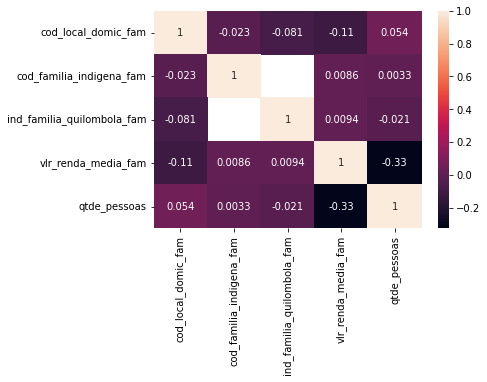

In [ ]:
#Gerando tabela de correlação
tc = df_familia.corr()
print(tc)
#Heatmap 
sns.heatmap(tc, xticklabels=tc.columns, yticklabels=tc.columns, annot=True)